In [138]:
# set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('combined_data.csv')

In [139]:
# --- Univariate Analysis (Q1) ---
# Summary statistics for Winner 5-Year Avg Attendance
print(df['Loser Capacity %'].describe())
print(df['Winner Capacity %'].describe())
diff_cap = df['Winner Capacity %'].describe() - df['Loser Capacity %'].describe()
diff_cap

count    942.000000
mean      87.031847
std       18.915412
min       20.000000
25%       75.000000
50%       96.000000
75%      100.000000
max      117.000000
Name: Loser Capacity %, dtype: float64
count    942.000000
mean      89.111465
std       17.495082
min       20.000000
25%       79.000000
50%       98.000000
75%      101.000000
max      117.000000
Name: Winner Capacity %, dtype: float64


count    0.000000
mean     2.079618
std     -1.420330
min      0.000000
25%      4.000000
50%      2.000000
75%      1.000000
max      0.000000
dtype: float64

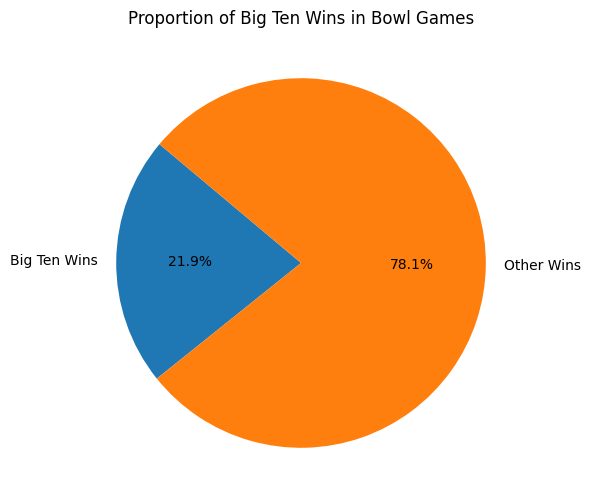

In [140]:
# Filter Big Ten winners
big_ten_wins = df[df['Winner Conference'] == 'Big Ten']

# Count Big Ten Wins
big_ten_win_count = len(big_ten_wins)
total_games = len(df)

# Pie chart: Big Ten Wins vs Others
plt.figure(figsize=(6,6))
plt.pie(
    [big_ten_win_count, total_games - big_ten_win_count],
    labels=['Big Ten Wins', 'Other Wins'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proportion of Big Ten Wins in Bowl Games')
plt.show()

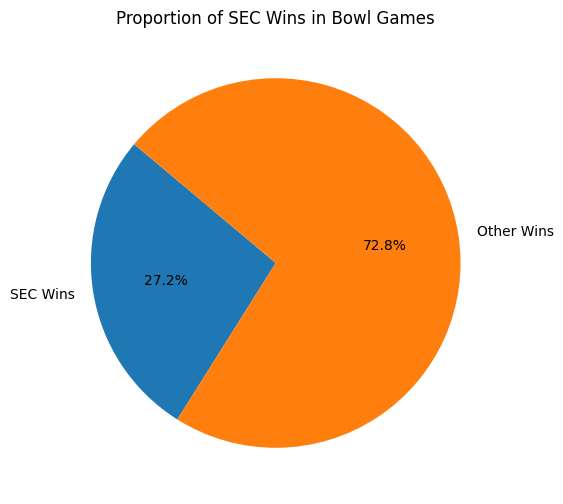

In [141]:
# Filter Big Ten winners
SEC_wins = df[df['Winner Conference'] == 'SEC']

# Count Big Ten Wins
SEC_win_count = len(SEC_wins)
total_games = len(df)

# Pie chart: Big Ten Wins vs Others
plt.figure(figsize=(6,6))
plt.pie(
    [SEC_win_count, total_games - SEC_win_count],
    labels=['SEC Wins', 'Other Wins'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proportion of SEC Wins in Bowl Games')
plt.show()

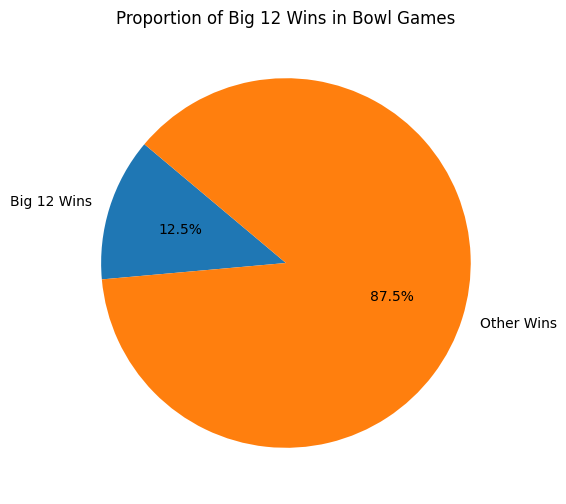

In [142]:
# Filter Big Ten winners
big_12_wins = df[df['Winner Conference'] == 'Big 12']

# Count Big Ten Wins
big_12_win_count = len(big_12_wins)
total_games = len(df)

# Pie chart: Big Ten Wins vs Others
plt.figure(figsize=(6,6))
plt.pie(
    [big_12_win_count, total_games - big_12_win_count],
    labels=['Big 12 Wins', 'Other Wins'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proportion of Big 12 Wins in Bowl Games')
plt.show()

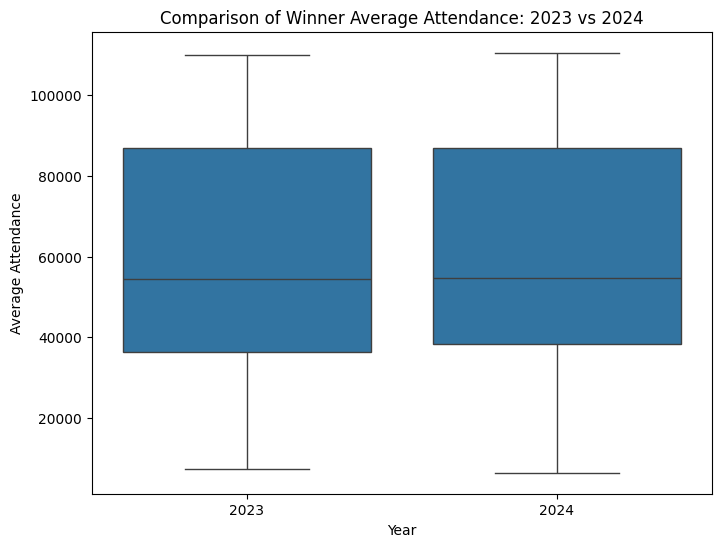

In [143]:
attendance_compare = pd.DataFrame({
    'Year': ['2023'] * len(df) + ['2024'] * len(df),
    'Attendance': pd.concat([df['Winner 2023 Avg Attendance'], df['Winner 2024 Avg Attendance']], ignore_index=True)
})


# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Year', y='Attendance', data=attendance_compare)
plt.title('Comparison of Winner Average Attendance: 2023 vs 2024')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.show()

# Q2

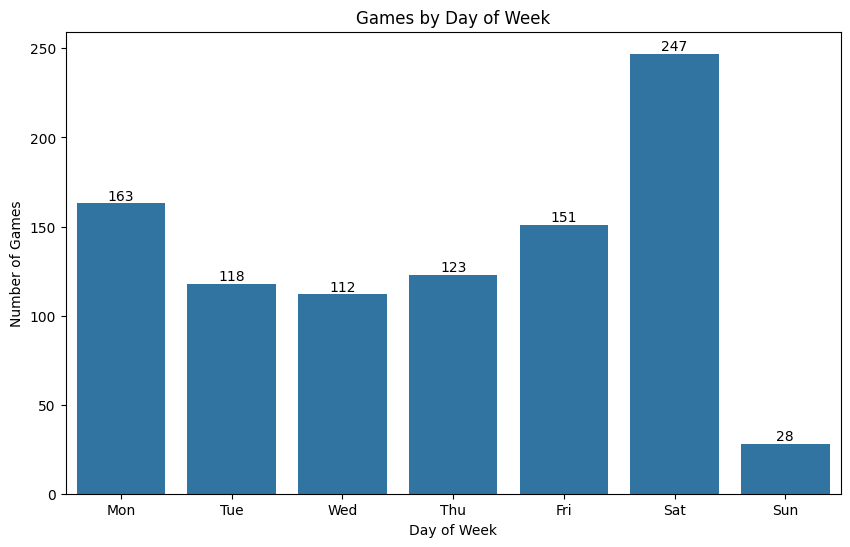

In [144]:
#Bar plt
plt.figure(figsize=(10,6))
ax = sns.countplot(x='day', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
for container in ax.containers:
    ax.bar_label(container)

plt.title('Games by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Games')
plt.show()

In [145]:
# ANOVA: Are point differentials different by day?

#Set up 
df['Point_Diff'] = abs(df['winner_points'] - df['loser_points'])
df['Total_Points'] = df['winner_points'] + df['loser_points']

#Hypothesis
anova_result = stats.f_oneway(*[df[df['day'] == day]['Point_Diff'] for day in df['day'].unique()])
print(f"ANOVA F-statistic (Point Differential by Day): {anova_result.statistic:.3f}, P-value: {anova_result.pvalue:.3f}")

# interpretation
alpha = 0.05  # Significance level
if  anova_result.pvalue > alpha:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

#Exploratory
anova_total_points = stats.f_oneway(*[df[df['day'] == day]['Total_Points'] for day in df['day'].unique()])
print(f"ANOVA F-statistic (Total Points by Day): {anova_total_points.statistic:.3f}, P-value: {anova_total_points.pvalue:.3f}")

# interpretation
alpha = 0.05  # Significance level
if  anova_total_points.pvalue > alpha:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")


ANOVA F-statistic (Point Differential by Day): 1.238, P-value: 0.284
The data follows a normal distribution (fail to reject H0).
ANOVA F-statistic (Total Points by Day): 0.858, P-value: 0.526
The data follows a normal distribution (fail to reject H0).


# Q3

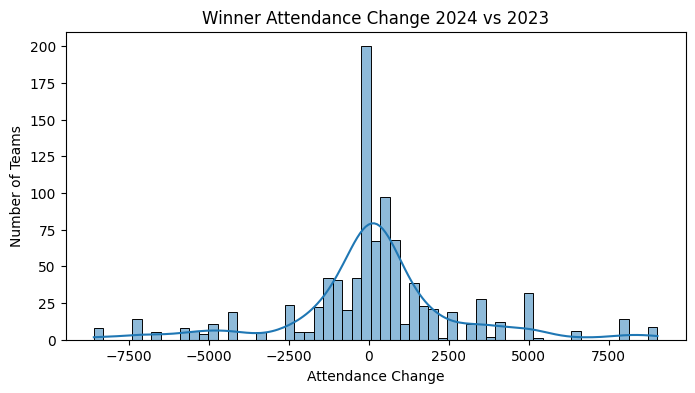

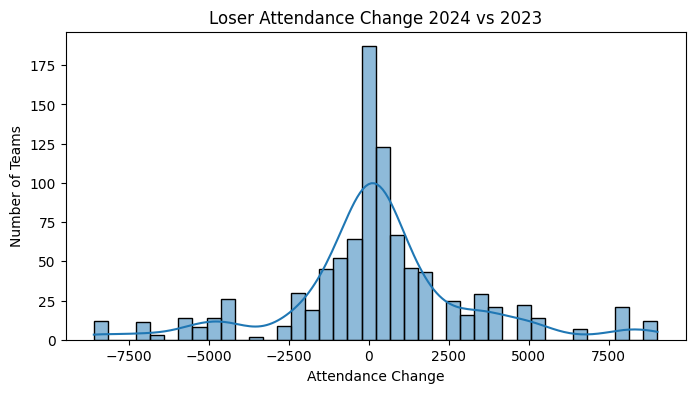

In [146]:
df['Winner_Attendance_Change'] = df['Winner 2024 Avg Attendance'] - df['Winner 2023 Avg Attendance']
df['Loser_Attendance_Change'] = df['Loser 2024 Avg Attendance'] - df['Loser 2023 Avg Attendance']

#hist plots
plt.figure(figsize=(8,4))
sns.histplot(df['Winner_Attendance_Change'], kde=True)
plt.title('Winner Attendance Change 2024 vs 2023')
plt.xlabel('Attendance Change')
plt.ylabel('Number of Teams')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Loser_Attendance_Change'], kde=True)
plt.title('Loser Attendance Change 2024 vs 2023')
plt.xlabel('Attendance Change')
plt.ylabel('Number of Teams')
plt.show()


In [147]:
t_stat, p_val = stats.ttest_1samp(df['Winner_Attendance_Change'].dropna(), 0)
print(f"T-statistic (Attendance Change): {t_stat:.3f}, P-value: {p_val:.3f}")

T-statistic (Attendance Change): 2.360, P-value: 0.018


In [148]:
#Log regression
df['Large_Attendance_Growth'] = (df['Winner_Attendance_Change'] > df['Winner_Attendance_Change'].median()).astype(int)

X = df[['Winner 5 Yr Avg Attendance', 'winner_points']]
y = df['Large_Attendance_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):.2f}")

Training Accuracy: 0.52
Test Accuracy: 0.49


In [149]:
df.head()

,winner_tie,loser_tie,Winner Conference,Loser Conference,year,date,day,bowl_name,winner_points,loser_points,...,Loser 2024 Avg Attendance,Loser 2023 Avg Attendance,Loser 5 Yr Avg Attendance,Winner Capacity %,Loser Capacity %,Point_Diff,Total_Points,Winner_Attendance_Change,Loser_Attendance_Change,Large_Attendance_Growth
0,Oklahoma,Oregon,SEC,Big Ten,2021,2021-12-29,Wed,Alamo Bowl,47,32,...,59104,55895,53384,104,109,15,79,-228,3209,0
1,Texas,Colorado,SEC,Big 12,2020,2020-12-29,Tue,Alamo Bowl,55,23,...,52514,53180,47579,102,104,32,78,761,-666,1
2,Texas,Utah,SEC,Big 12,2019,2019-12-31,Tue,Alamo Bowl,38,10,...,52962,52499,49833,102,102,28,48,761,463,1
3,Washington State,Iowa State,Pac-12,Big 12,2018,2018-12-28,Fri,Alamo Bowl,28,26,...,57884,60384,58847,69,94,2,54,-5610,-2500,0
4,Oklahoma State,Colorado,Big 12,Big 12,2016,2016-12-29,Thu,Alamo Bowl,38,8,...,52514,53180,47579,100,104,30,46,-1689,-666,0


In [150]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


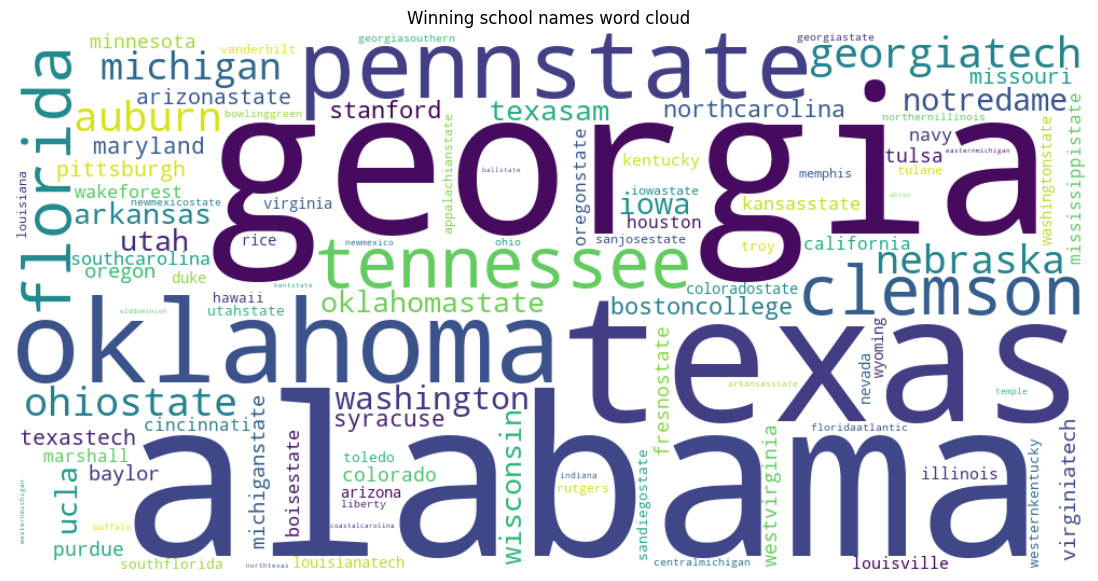

In [151]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud

# function to preprocess text from classx
def preprocess_text(text):
    if not isinstance(text, str):  # Check if the input is not a string
        return ""  # Return an empty string for non-string values
    text = text.lower()  # Convert to lowercase
    text = re.sub(' ', '', text)  # Remove spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text.strip()  # Remove leading and trailing whitespaces

df['winner_names'] = df['winner_tie'].fillna('').apply(preprocess_text)


all_words = ' '.join(df['winner_names'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Winning school names word cloud")
plt.show()

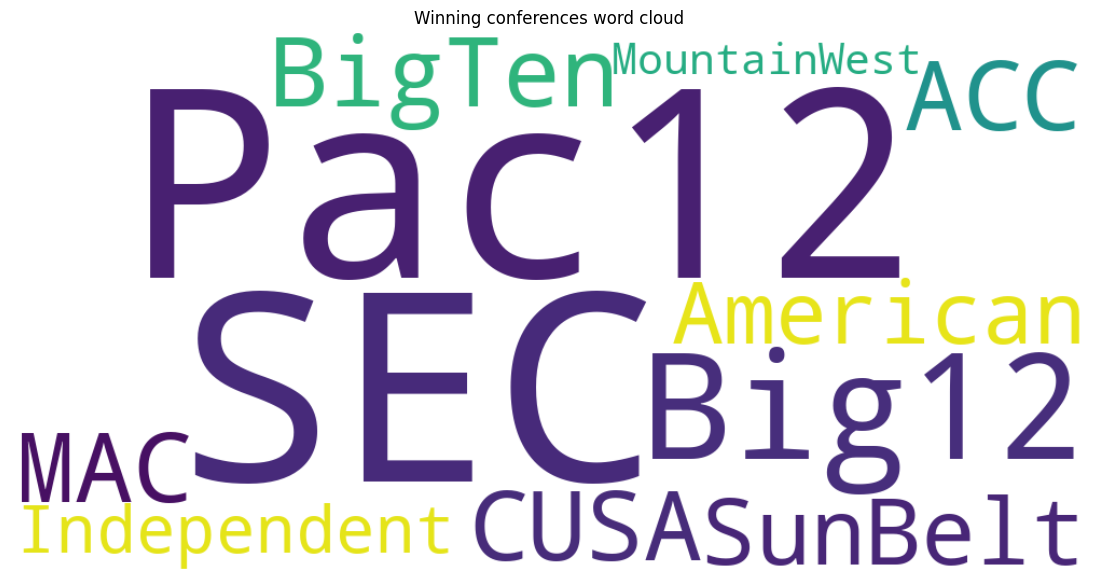

In [152]:

#df['Winner Conference'] = df['Winner Conference'].astype(str)



df['Winner Conference'] = df['Winner Conference'].str.replace(" ", "")
df['Winner Conference'] = df['Winner Conference'].str.replace("-", "")

#Winner_Conference_unique = df['Winner Conference'].unique()

all_words = ' '.join(df['Winner Conference'].unique())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Winning conferences word cloud")
plt.show()